### Use Shopping dataset of Q1 and perform the agglomerative clustering using 'complete' linkage. Evaluate the quality of clusters formed by agglomerative clustering and compare the results with the clusters obtained in Q1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv('D:\Dataset\shopping_data.csv')
data.head()

<IPython.core.display.Javascript object>

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = data.drop(['Spending Score (1-100)', 'CustomerID'], axis=1)
y = data['Spending Score (1-100)']

In [4]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

X['Genre'] = label_enc.fit_transform(X['Genre'].values)
X.head()

,Genre,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [5]:
from scipy.cluster.hierarchy import linkage  

linked = linkage(X, 'complete')

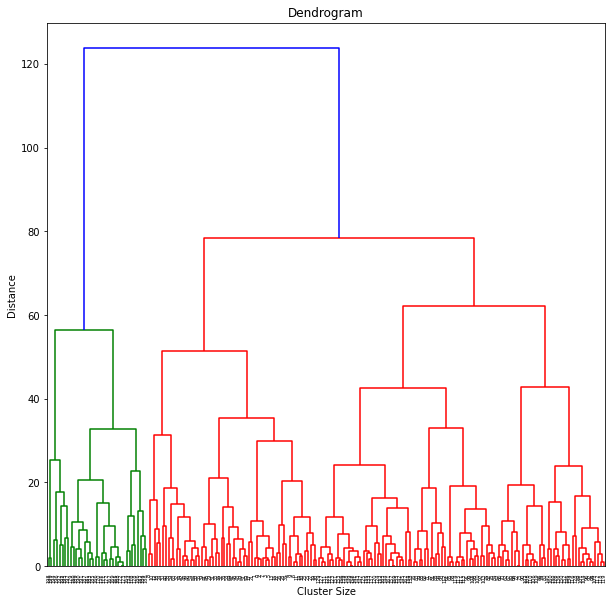

In [6]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,10))
dendrogram(linked, orientation='top')
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

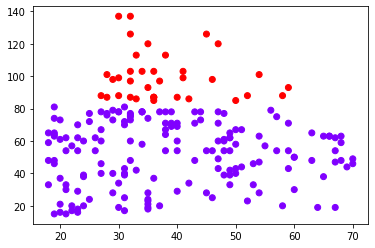

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Clusters = 2
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='rainbow')

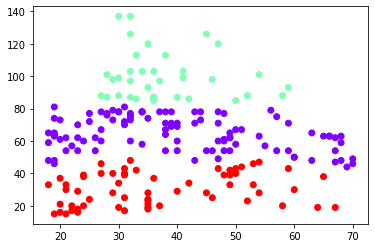

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Clusters = 3
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='rainbow')

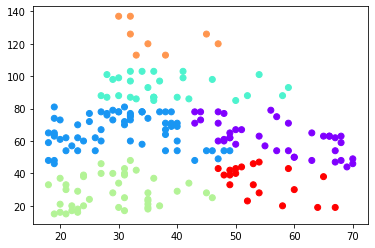

In [9]:
# Clusters = 6
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='rainbow')

### Evaluating cluster quality using Silhouette

In [10]:
from sklearn.metrics import silhouette_score 

k = range(2,9)
sil_scr = []

for x in k:
    ac = AgglomerativeClustering(n_clusters = x, affinity='euclidean', linkage='complete') 
    sil_scr.append(silhouette_score(X, ac.fit_predict(X)))

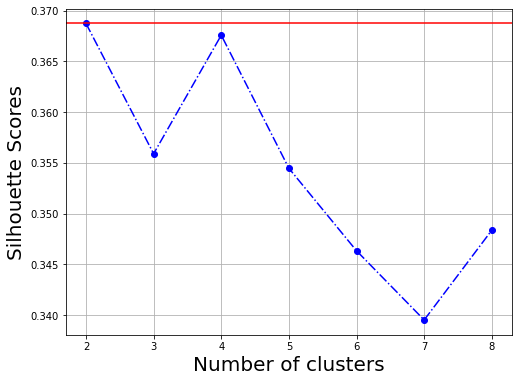

In [11]:
plt.figure(figsize=(8,6))
# plt.bar(k, sil_scr) 
plt.plot(k, sil_scr, 'bo-.')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Scores', fontsize = 20)
plt.axhline(np.max(sil_scr), color="red")
plt.grid()
plt.show()

In [12]:
print("Max Silhouette score of '{0}'' at clusters = {1}".format(np.max(sil_scr), k[np.argmax(sil_scr)]))

Max Silhouette score of '0.36872595417160225'' at clusters = 2


In [13]:
print("Max Silhouette score in case of:"
      "\n\t-Single linkage: '{0}'\n\t-Complete linkage: '{1}'".format(np.max(sil_scr), 0.17474069652429397))

Max Silhouette score in case of:
	-Single linkage: '0.36872595417160225'
	-Complete linkage: '0.17474069652429397'


<h3><u>Verdit</u></h3>By observing <i>dendrograms and silhoutte score</i> we can conclude that <i>shopping dataset</i> form better cluster on <b>complete linkage</b> over <b>single linkage</b>.